# AB Testing Toy Example
## A Company is trying to get more people to buy product
### The goal of running an A/B test is to evaluate if a change on the web page will lead to conversion. 

#### I have already generated some synthetic data to represent this problem. 

#### Sample Size - we are going to select 1000 each for A and B version of the pages. 
#### Converted is the metric we are tracking - 1 means converted - purchased and 0 means not converted. 

#### Also, lets say the baseline conversion rate and desired bump or lift to be 10% and 3%, respectively. So, if we get 3% or more with the variant, we are looking. More on that as we continue with this. Desired bump or lift is the <b>Minimal detectable effect</b> we learned in the previous module. 

##### <i>Code borrowed from Nguyen Ngo's blog posts</i> 

In [ ]:
# lets load the csv file and see what we have in there


In [1]:
from google.colab import drive

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
import scipy.stats as scs

#from .stats import pooled_SE, confidence_interval, ab_dist, p_val, z_val

plt.style.use('ggplot')

In [2]:
# mount google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
!ls
!cd drive

drive  sample_data


In [4]:
cd drive/MyDrive

/content/drive/MyDrive


In [5]:
cd AB\ Testing

/content/drive/MyDrive/AB Testing


In [6]:
ls

'A B AB Testing.gdoc'   ab_syn.csv     ab_test.csv       Untitled6.ipynb
 ab_data.csv            ab_test1.csv   Untitled0.ipynb


In [7]:
!ls

'A B AB Testing.gdoc'   ab_syn.csv     ab_test.csv	 Untitled6.ipynb
 ab_data.csv	        ab_test1.csv   Untitled0.ipynb


In [8]:
df = pd.read_csv("ab_test1.csv")

In [9]:
df

,Unnamed: 0,group,converted
0,0,B,1
1,1,A,0
2,2,A,0
3,3,A,1
4,4,B,0
...,...,...,...
1995,1995,A,0
1996,1996,A,0
1997,1997,A,0
1998,1998,B,0


/content/drive/My Drive/AB Testing


### Pandas Pivot_table create a spreadsheet-style pivot table as a DataFrame.
#### So, we use that to aggregated our data using aggfunction np.sum. 


In [10]:
ab_summary = df.pivot_table(values='converted', index='group', aggfunc=np.sum)
# add additional columns to the pivot table
ab_summary['total'] = df.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = df.pivot_table(values='converted', index='group')

In [11]:

ab_summary

,converted,total,rate
group,,,
A,113,1035,0.109179
B,143,965,0.148187


In [12]:
ab_summary['rate'][1] - ab_summary['rate'][0]

0.03900778453605666

### Added rate and total. 
#### If you see conversion rate difference between A and B
##### 3.9% - which is better than on our initial goal of 3%. 
### So, is this good enough for us to go with the new design? How confident are we? Lets explore this further.

### Plot of  Distribution of the control group (A) and test group (B)


Text(0.5, 1.0, 'Distribution of Control Group (A) and Test Group (B)')

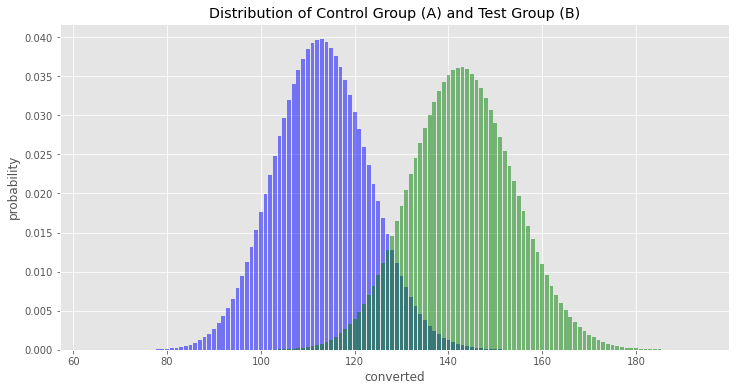

In [25]:
B_converted=143
B_total = 965



fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(A_converted-49, A_converted+50, 100)
yA = scs.binom(A_total, A_cr).pmf(xA)
ax.bar(xA, yA, alpha=0.5, color='blue')
xB = np.linspace(B_converted-49, B_converted+50, 100)
yB = scs.binom(B_total, B_cr).pmf(xB)
ax.bar(xB, yB, alpha=0.5, color='green')
plt.xlabel('converted')
plt.ylabel('probability')
plt.title('Distribution of Control Group (A) and Test Group (B)')


In [ ]:
# Test group B converted more users than in the control group A.
# If we were to focus on conversion, can we measure the probability of conversion for each of the groups?
# Using few additional statistical tools like Bernoulli's and Central limit theorem we can do a comparison


### Using Central Limit Theorem and Bernoullis, we can calculate the conversion rate to compare these 2 distributions

Text(0, 0.5, 'PDF')

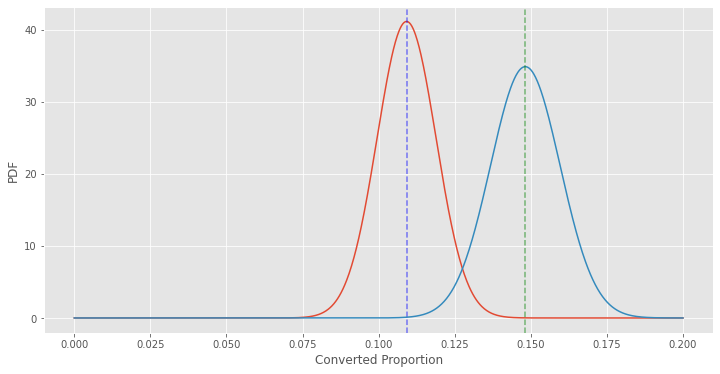

In [29]:
# The central limit theorem (CLT) is one of the most important results in probability theory. 
# It states that, under certain conditions, the sum of a large number of random variables is approximately normal.

# The average of many independent samples is (with high probability) close to the mean
# of the underlying distribution.

# Standard deviation is equal to the standard error of the mean.

SE_A = np.sqrt(A_cr * (1-A_cr)) / np.sqrt(A_total)
SE_B = np.sqrt(B_cr * (1-B_cr)) / np.sqrt(B_total)
# plot the null and alternative hypothesis
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(0, .2, 1000)

# Representing both the groups as normal distribution

yA = scs.norm(A_cr, SE_A).pdf(x)
ax.plot(xA, yA)
ax.axvline(x=A_cr, c='blue', alpha=0.5, linestyle='--')
xB = np.linspace(0, .2, 1000)
yB = scs.norm(B_cr, SE_B).pdf(x)
ax.plot(xB, yB)
ax.axvline(x=B_cr, c='green', alpha=0.5, linestyle='--')
plt.xlabel('Converted Proportion')
plt.ylabel('PDF')

In [1]:
# The dashed lines represent the mean conversion rate for each group. 
# The distance between the blue dashed line and the green dashed line is equal to mean difference between 
# the control and test group. As you can see converted proportion for B is better than A. 


## Closing Comments
### Like this, if you continue to use existing statistical tools, you will be able to statistically determine if the new variant is better than the current version and its significant and the confidence level and so on and so forth. 

In the interest of time, I will skip few steps and walk through one point. 

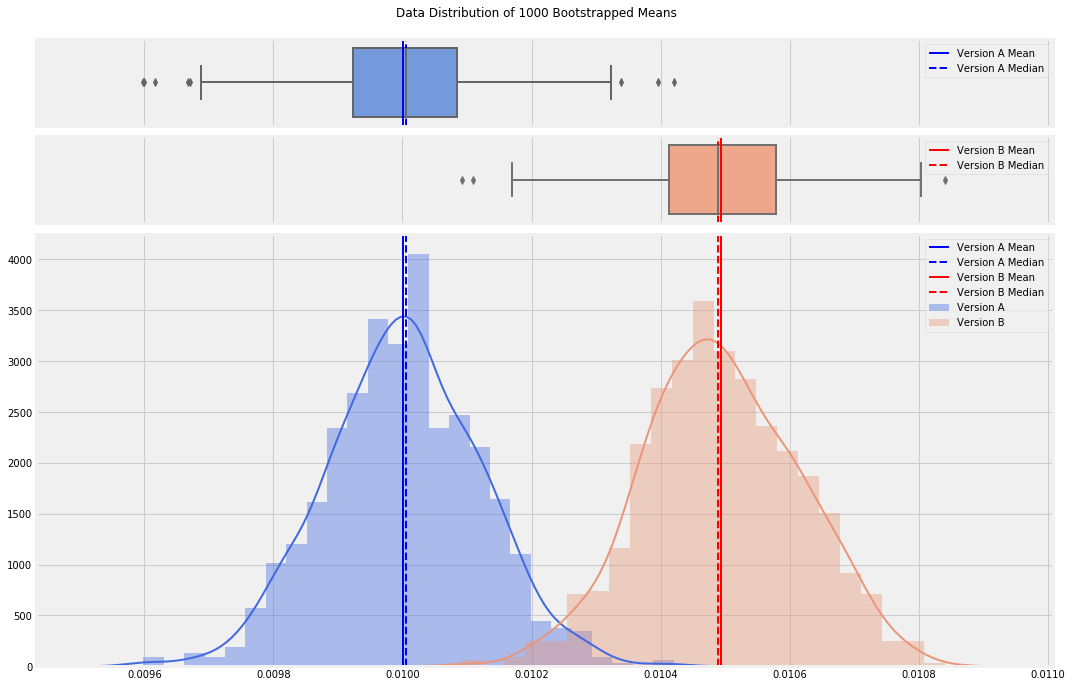

#### In the above distributions, version A has a mean of 0.01 - 1% click-through rate, or CTR. We want to see a minimum of 5% improvement, or a CTR of at least 1.05%. 

#### Next, we set our confidence level, the statistical confidence that our observed results are due to a true difference as opposed to random chance. Typically, this is called alpha and set to 95%. 

#### In order to determine how many observations to collect, we use power analysis to determine the required sample size. If alpha can be thought of as the acceptable rate of making a Type I error (False Positive), power can be thought of as the acceptable rate of making a Type II error (False Negative).

#### Many statisticians believe a Type I error is 4x as costly as a Type II error. Put another way: Your eCommerce website is currently running fine. You believe you’ve identified a change that will increase sales so you implement the change, only to find out that the change actually hurt the website. This is a Type I error and has lost you sales. Now imagine that you consider making a change but decide it won’t improve things, even though in reality it would have, and so you don’t make the change. This is a Type II error, and cost you doing nothing about potential opportunity. So if we set our confidence level to 95%, that means that we’re willing to accept a Type I error in only 5% of our experiments. If a Type I error is 4x as costly as a Type II error, that implies that we set our power to 80%; we’re willing to be conservative and ignore a potentially positive change 20% of the time.

Using **sigma** for standard deviation and **d** the difference between the two means, we’ll need to look up z-scores for both alpha and beta, and calculate our sample size with this equation:


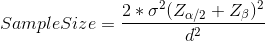

With that, run your A/B test until the required sample size is obtained. Randomly show visitors to your site either version A or version B and record the CTR for each version. 

You then either use a stats package or **t-test** calculations and a t-test table to arrive at a **p-value**; if the p-value is less than your alpha, 0.05 in this case, then you can state with 95% confidence that you have observed a true difference between version A and version B, not one due to chance.